In [6]:
##Cluster analysis and trajectory analysis of different data sets are carried out. 
#Cluster analysis is combined with local structure to visualize gene data, 
##and trajectory analysis is combined with global information to visualize gene data.
##the data is multi-omic data integration
import scanpy as sc
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import pandas as pd
import genomap.genoMOI as gp

D:\Anaconda\envs\genomap\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Found 2000 genes among all datasets
[[0.         0.73279925 0.37752703 0.21881838 0.16420912]
 [0.         0.         0.52591894 0.17286652 0.06769437]
 [0.         0.         0.         0.5404814  0.24329759]
 [0.         0.         0.         0.         0.22757112]
 [0.         0.         0.         0.         0.        ]]
Processing datasets (0, 1)
Processing datasets (2, 3)
Processing datasets (1, 2)
Processing datasets (0, 2)
Processing datasets (2, 4)
Processing datasets (3, 4)
Processing datasets (0, 3)
Processing datasets (1, 3)
Processing datasets (0, 4)
         Falling back to preprocessing with `sc.pp.pca` and default params.
Begin pretraining:  ------------------------------------------------------------
Epoch 1/10
231/231 [==============================] - 5s 15ms/step - loss: 0.8544
Epoch 2/10
231/231 [==============================] - 4s 16ms/step - loss: 0.7118
Epoch 3/10
231/231 [==============================] - 4s 17ms/step - loss: 0.6649
Epoch 4/10
231/231 [=======

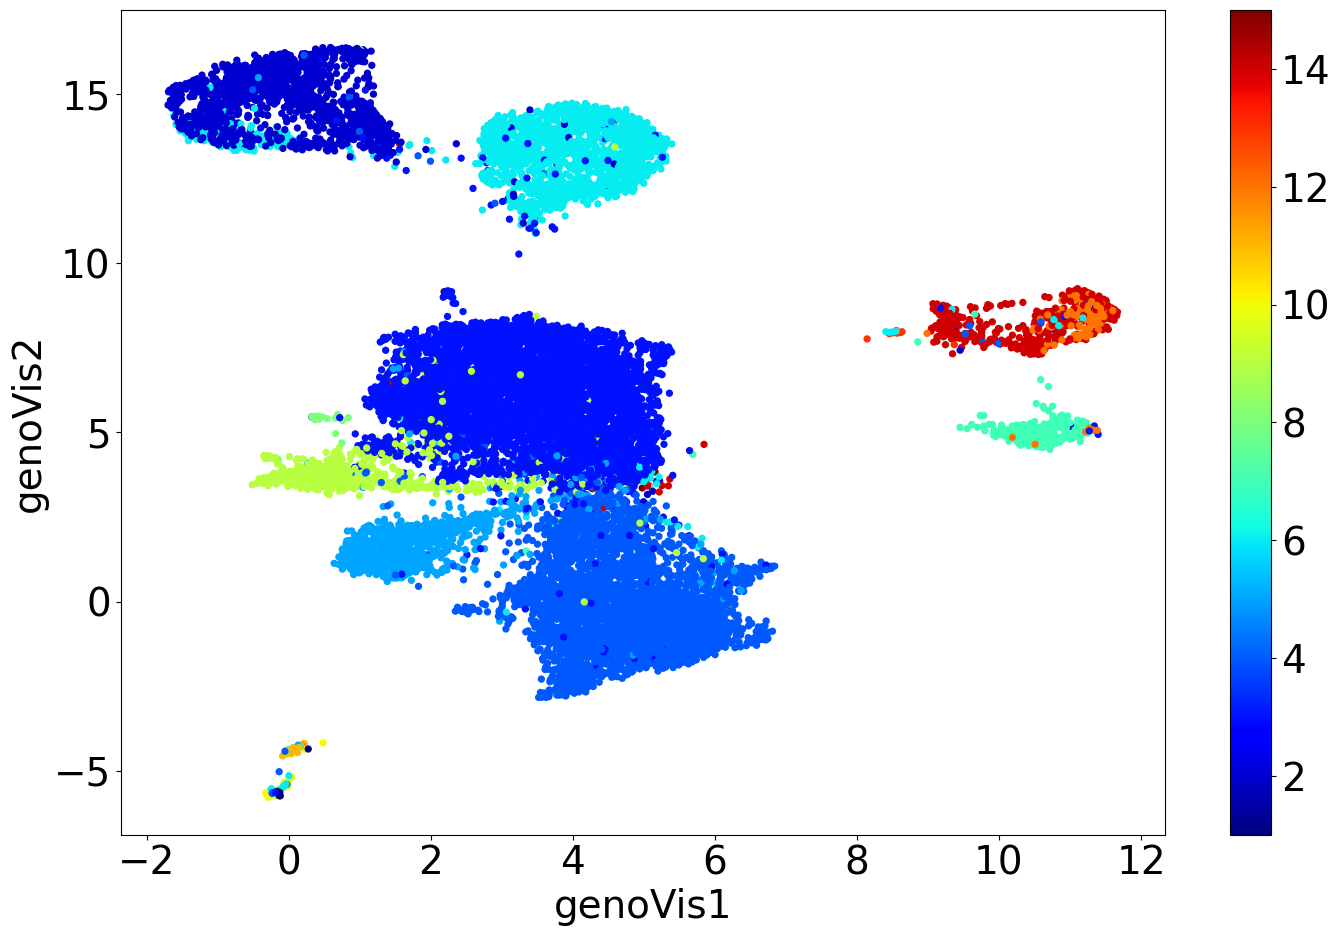

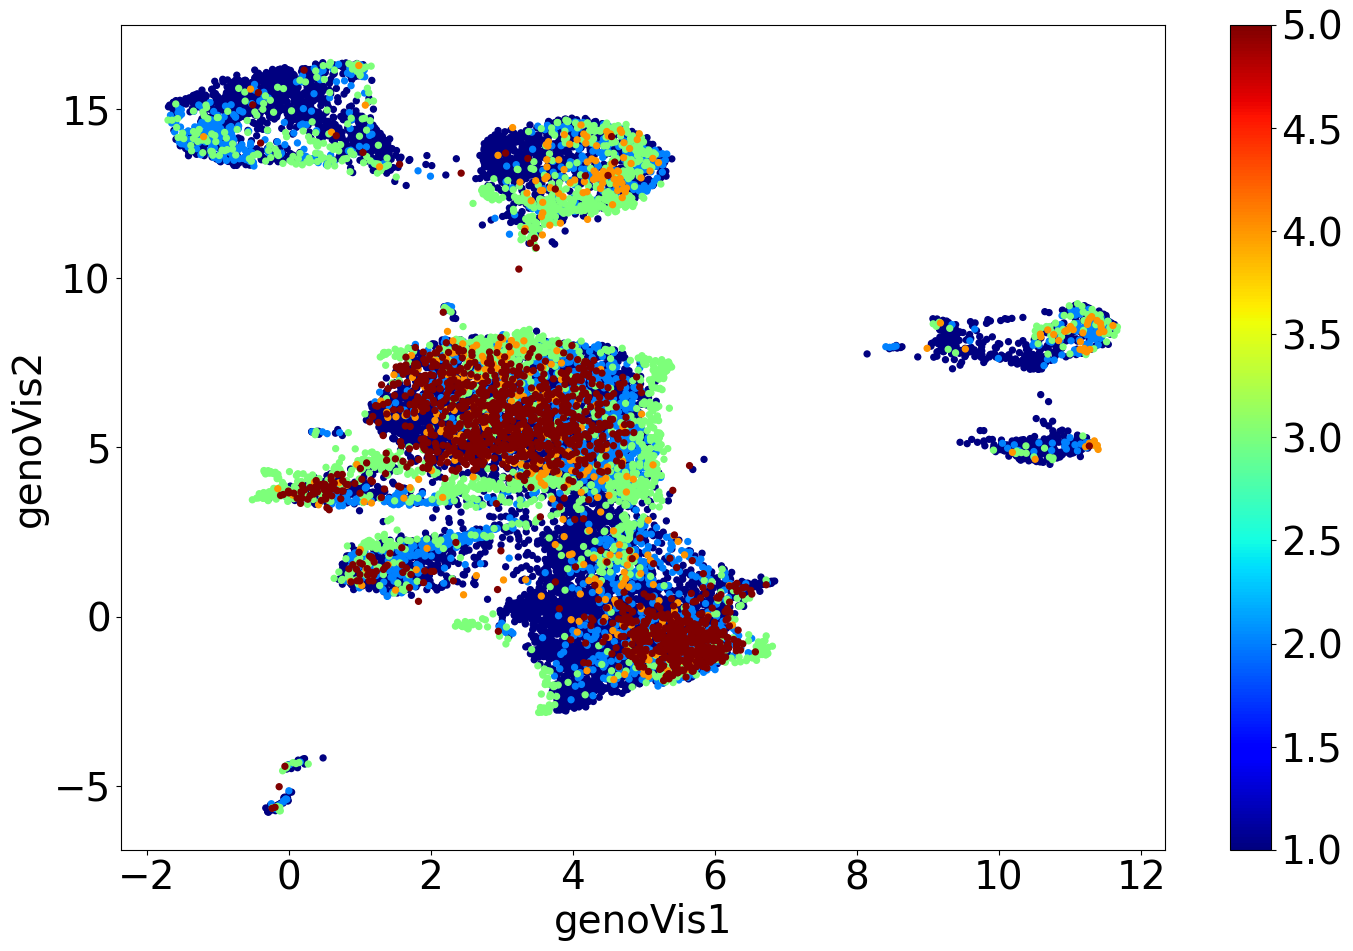

D:\Anaconda\envs\genomap\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Found 2000 genes among all datasets
[[0.         0.73279925 0.37752703 0.21881838 0.16420912]
 [0.         0.         0.52591894 0.17286652 0.06769437]
 [0.         0.         0.         0.5404814  0.24329759]
 [0.         0.         0.         0.         0.22757112]
 [0.         0.         0.         0.         0.        ]]
Processing datasets (0, 1)
Processing datasets (2, 3)
Processing datasets (1, 2)
Processing datasets (0, 2)
Processing datasets (2, 4)
Processing datasets (3, 4)
Processing datasets (0, 3)
Processing datasets (1, 3)
Processing datasets (0, 4)
         Falling back to preprocessing with `sc.pp.pca` and default params.
Begin pretraining:  ------------------------------------------------------------
Epoch 1/10
231/231 [==============================] - 6s 19ms/step - loss: 0.8577
Epoch 2/10
231/231 [==============================] - 4s 18ms/step - loss: 0.7130
Epoch 3/10
231/231 [==============================] - 4s 17ms/step - loss: 0.6653
Epoch 4/10
231/231 [=======

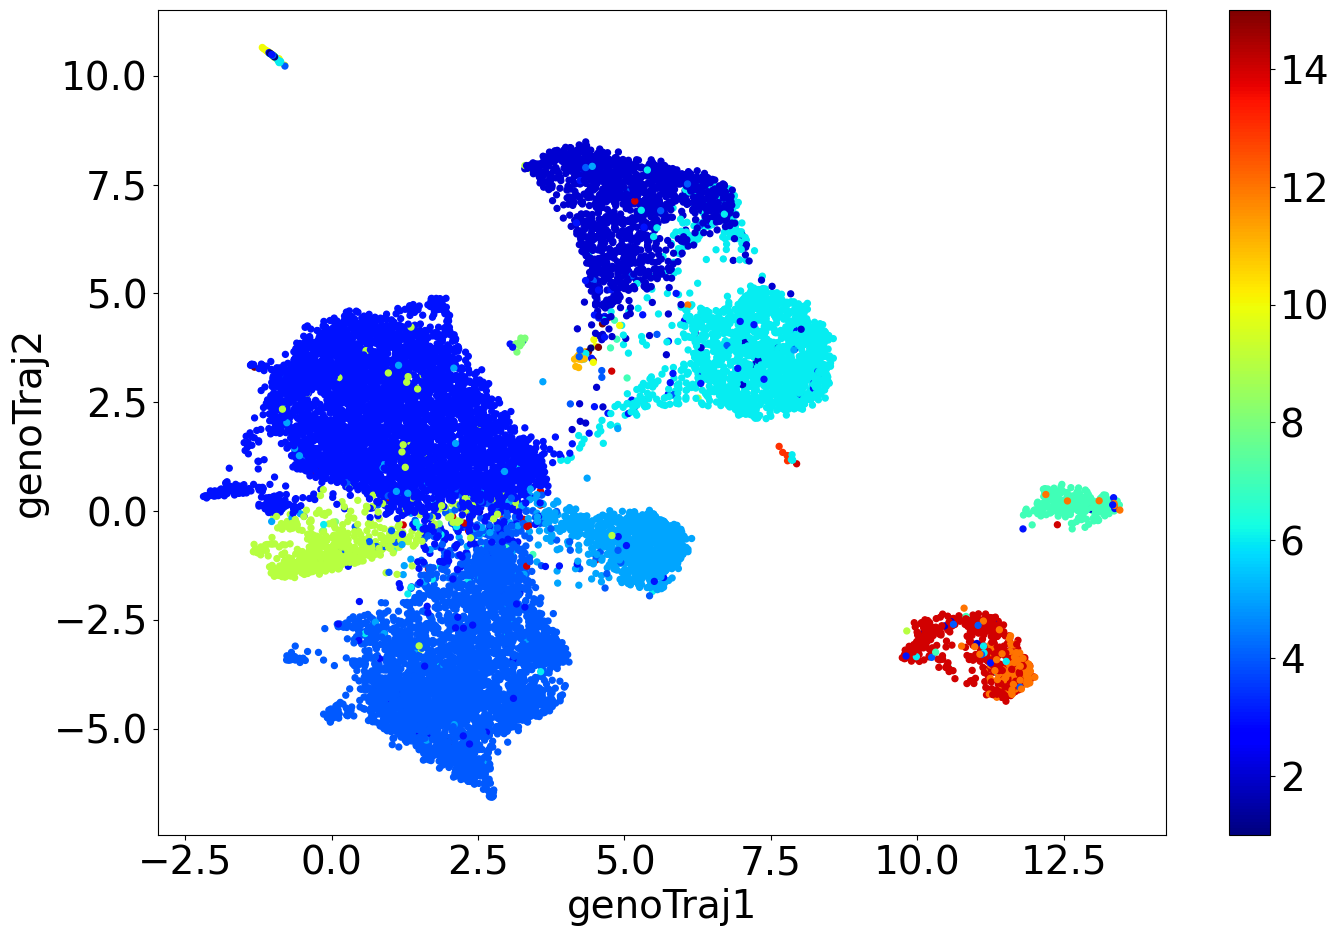

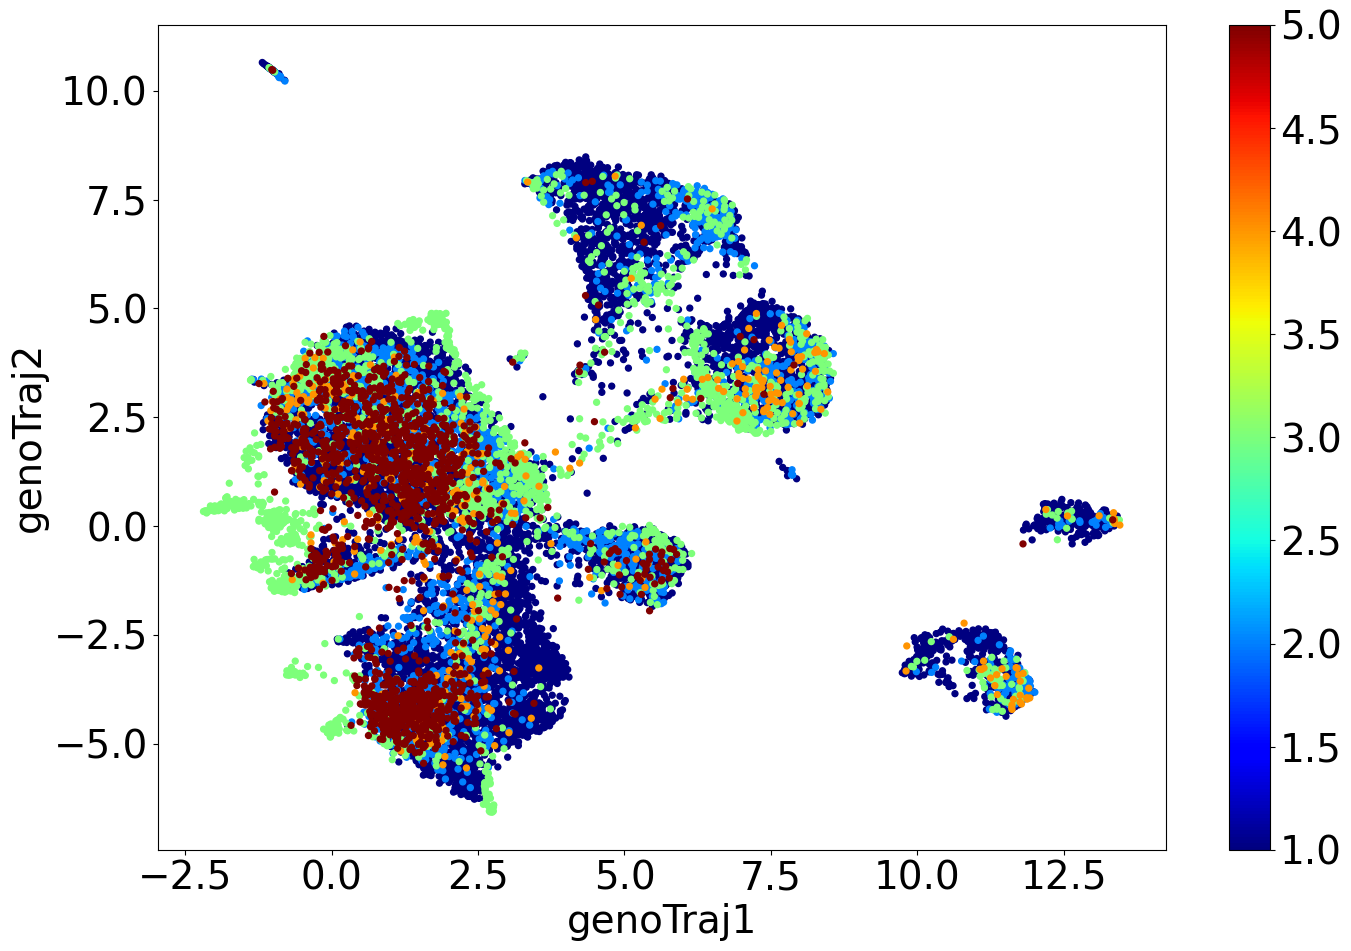

In [9]:
# Load five different pancreatic datasets
dx = sio.loadmat('dataBaronX.mat')
data=dx['dataBaron']
dx = sio.loadmat('dataMuraroX.mat')
data2=dx['dataMuraro']
dx = sio.loadmat('dataScapleX.mat')
data3=dx['dataScaple']
dx = sio.loadmat('dataWangX.mat')
data4=dx['dataWang']
dx = sio.loadmat('dataXinX.mat')
data5=dx['dataXin']

# Load class and batch labels
dx = sio.loadmat('classLabel.mat')
y = np.squeeze(dx['classLabel'])
dx = sio.loadmat('batchLabel.mat')
ybatch = np.squeeze(dx['batchLabel'])

# Apply genomap-based multi omic integration and visualize the integrated data with local structure for cluster analysis
# returns 2D visualization, cluster labels, and intgerated data
resVis,cli,int_data=gp.genoMOIvis(data, data2, data3, data4, data5, colNum=12, rowNum=12, n_dim=32, epoch=10, prealign_method='scanorama')

# Plot colored with cell class labels
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 28})    
h1=plt.scatter(resVis[:, 0], resVis[:, 1], c=y,cmap='jet', marker='o', s=18)      
plt.xlabel('genoVis1')
plt.ylabel('genoVis2')
plt.tight_layout()
plt.colorbar(h1)
plt.show()

# Plot colored with batch labels
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 28})    
h1=plt.scatter(resVis[:, 0], resVis[:, 1], c=ybatch,cmap='jet', marker='o', s=18)      
plt.xlabel('genoVis1')
plt.ylabel('genoVis2')
plt.tight_layout()
plt.colorbar(h1)
plt.show()

# Apply genomap-based multi omic integration and visualize the integrated data with global structure for trajectory analysis

# returns 2D embedding, cluster labels, and intgerated data
resTraj,cli,int_data=gp.genoMOItraj(data, data2, data3, data4, data5, colNum=12, rowNum=12, n_dim=32, epoch=10, prealign_method='scanorama')

# Plot colored with cell class labels
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 28})    
h1=plt.scatter(resTraj[:, 0], resTraj[:, 1], c=y,cmap='jet', marker='o', s=18)      
plt.xlabel('genoTraj1')
plt.ylabel('genoTraj2')
plt.tight_layout()
plt.colorbar(h1)
plt.show()

# Plot colored with batch labels
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 28})    
h1=plt.scatter(resTraj[:, 0], resTraj[:, 1], c=ybatch,cmap='jet', marker='o', s=18)      
plt.xlabel('genoTraj1')
plt.ylabel('genoTraj2')
plt.tight_layout()
plt.colorbar(h1)
plt.show()